## Exploring Global Happiness üåçüòä

This project, undertaken by third-year **Computer Science** students at the University of Havana, focuses on a comprehensive **statistical analysis** of the **World Happiness Index** across 159 countries. The primary objective is to explore and understand the factors influencing happiness on a global scale. Through this study, we will employ a range of statistical techniques, including:

* **Descriptive statistics** to summarize the data
* **Inferential statistics** to draw conclusions about the population
* **Hypothesis testing** to validate our assumptions

Additionally, we will perform *value estimations* and analyze the relationships between various **socio-economic factors** and happiness scores. This project aims to provide valuable insights into the determinants of happiness and contribute to the broader understanding of global well-being. üåçüìä

> Javier Alejandro Gonz√°lez D√≠az C-312

> Kevin M√°rquez Vega C-312

> Jos√© Miguel Leyva de la Cruz C-312

### Importando librer√≠as necesarias 

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Celda 1: Importar librer√≠as
import matplotlib.pyplot as plt

# Configuraci√≥n de gr√°ficos
%matplotlib inline
sns.set(style="whitegrid")

## Cargando el DataSet sobre un Ranking de Felicidad Mundial tomado en 159 pa√≠ses diferentes

In [22]:
df = pd.read_csv('2019.csv')

### Exploraci√≥n inicial del DataSet

In [23]:
df.head(20)

Overall rank Country or region  Score  GDP per capita  Social support  \
0              1           Finland  7.769           1.340           1.587   
1              2           Denmark  7.600           1.383           1.573   
2              3            Norway  7.554           1.488           1.582   
3              4           Iceland  7.494           1.380           1.624   
4              5       Netherlands  7.488           1.396           1.522   
5              6       Switzerland  7.480           1.452           1.526   
6              7            Sweden  7.343           1.387           1.487   
7              8       New Zealand  7.307           1.303           1.557   
8              9            Canada  7.278           1.365           1.505   
9             10           Austria  7.246           1.376           1.475   
10            11         Australia  7.228           1.372           1.548   
11            12        Costa Rica  7.167           1.034           1.441   
12            13            Israel  7.139           1.276           1.455   
13            14        Luxembourg  7.090           1.609           1.479   
14            15    United Kingdom  7.054           1.333           1.538   
15            16           Ireland  7.021           1.499           1.553   
16            17           Germany  6.985           1.373           1.454   
17            18           Belgium  6.923           1.356           1.504   
18            19     United States  6.892           1.433           1.457   
19            20    Czech Republic  6.852           1.269           1.487   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
0                     0.986                         0.596       0.153   
1                     0.996                         0.592       0.252   
2                     1.028                         0.603       0.271   
3                     1.026                         0.591       0.354   
4                     0.999                         0.557       0.322   
5                     1.052                         0.572       0.263   
6                     1.009                         0.574       0.267   
7                     1.026                         0.585       0.330   
8                     1.039                         0.584       0.285   
9                     1.016                         0.532       0.244   
10                    1.036                         0.557       0.332   
11                    0.963                         0.558       0.144   
12                    1.029                         0.371       0.261   
13                    1.012                         0.526       0.194   
14                    0.996                         0.450       0.348   
15                    0.999                         0.516       0.298   
16                    0.987                         0.495       0.261   
17                    0.986                         0.473       0.160   
18                    0.874                         0.454       0.280   
19                    0.920                         0.457       0.046   

    Perceptions of corruption      Continent  
0                       0.393         Europe  
1                       0.410         Europe  
2                       0.341         Europe  
3                       0.118         Europe  
4                       0.298         Europe  
5                       0.343         Europe  
6                       0.373         Europe  
7                       0.380        Oceania  
8                       0.308  North America  
9                       0.226         Europe  
10                      0.290        Oceania  
11                      0.093  North America  
12                      0.082           Asia  
13                      0.316         Europe  
14                      0.278         Europe  
15                      0.310         Europe  
16                      0.265         Europe  
17    

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
 9   Continent                     156 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 12.3+ KB


In [25]:
print(df.describe())

       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%             

### Limpieza de datos
(Manejar valores nulos)

In [26]:
df = df.dropna()

### An√°lisis exploratorio de datos (EDA) 

> Distribuci√≥n normal del Happinness Score

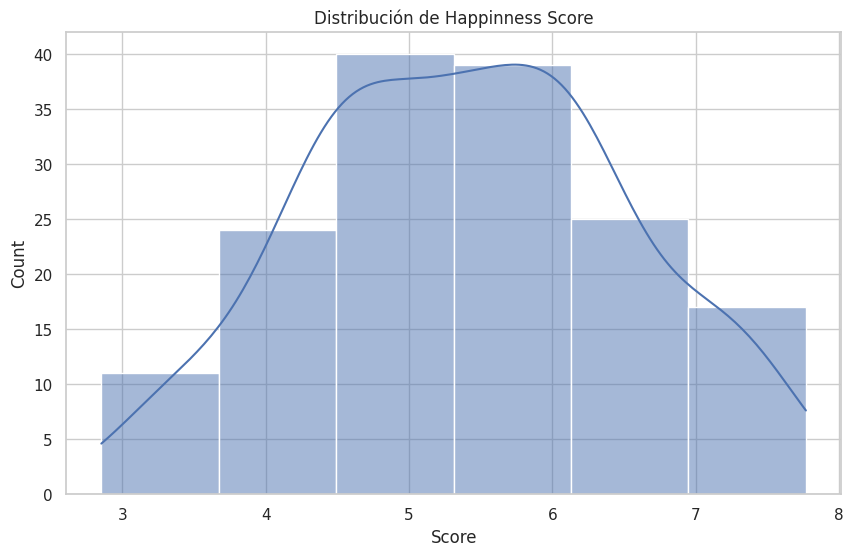

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], kde=True,binwidth=0.8)
plt.title('Distribuci√≥n de Happinness Score')
plt.show()

### Gr√°fico de dispersi√≥n entre dos columnas

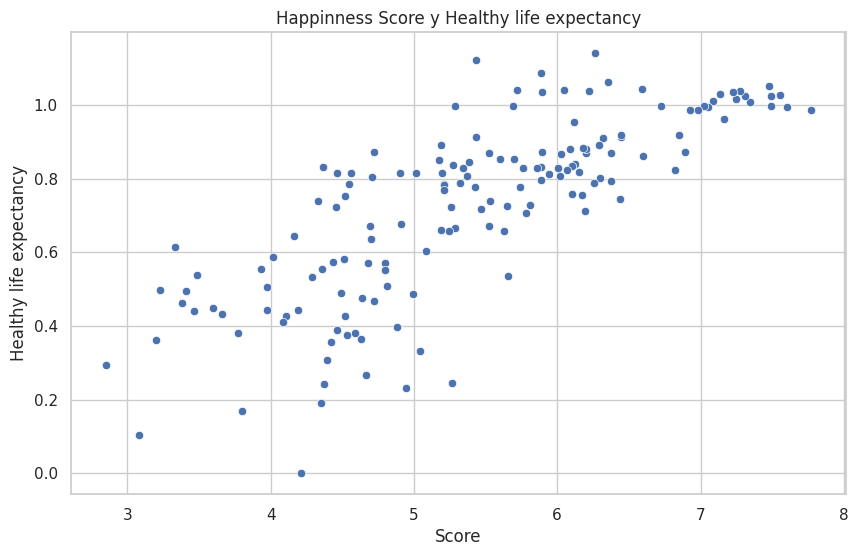

In [28]:
# Gr√°fico de dispersi√≥n entre dos columnas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score', y='Healthy life expectancy', data=df)
plt.title('Happinness Score y Healthy life expectancy')
plt.show()

### An√°lisis estad√≠sticos espec√≠ficos
Correlaci√≥n entre variables

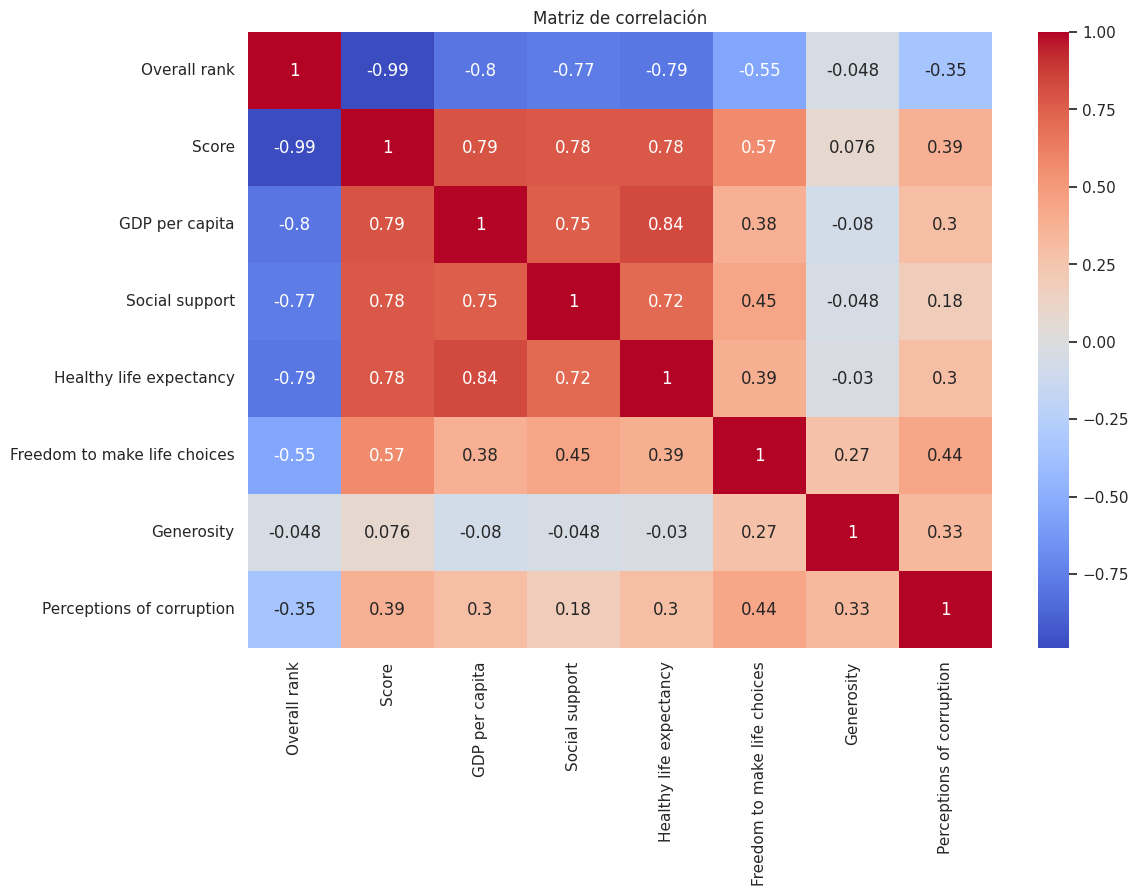

KeyError: 'grupo'

In [29]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlaci√≥n')
plt.show()

# Prueba de hip√≥tesis (Ejemplo: prueba t de dos muestras)
grupo1 = df[df['grupo'] == 'A']['columna_interes']
grupo2 = df[df['grupo'] == 'B']['columna_interes']
t_stat, p_value = ttest_ind(grupo1, grupo2)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

### Estimador de la media
Sabemos que nuestro par√°metro de la media del valor "Score" distribuye de manera normal, por tanto podemos calcular el valor de la media utilizando la siguiente f√≥rmula.
$$ \hat{x} = 1/n * \sum_{i = 1}^{n} x_i $$

In [10]:
mean = df['Score'].mean()
mean

5.407096153846155

### Agrupaci√≥n de pa√≠ses por Continentes
La Felicidad evidentemente no se comporta igual por continentes. Seg√∫n la encuesta analizada notemos como se tiene en cuenta el PIB de cada pa√≠s, el cual puede ser drasticamente desigual entre pa√≠ses de continentes diferentes. Ser√≠a interesante lograr obtener informaci√≥n sobre el comportamiento de la felicidad seg√∫n el continente al que pertenece cada pa√≠s.

In [11]:
continents_groups = df.groupby('Continent')['Continent'].agg('count')
continents_groups

Continent
Africa           45
Asia             43
Europe           43
North America    13
Oceania           2
South America    10
Name: Continent, dtype: int64

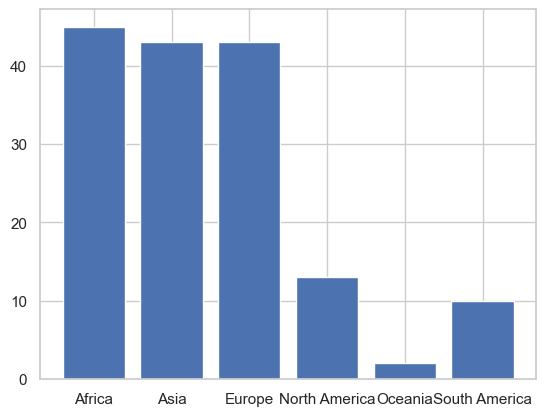

In [ ]:
plt.bar(continents_groups.index, continents_groups.values)
plt.show()

### Estimaciones importantes
Como mencionamos anteriormente la felicidad puede comportarse diferente seg√∫n el continente al que pertenece un pa√≠s en espec√≠fico, de manera general se puede afirmar que por continentes los √≠ndices de felicidad pueden sufirir una variaci√≥n considerable. 

Si quisieramos estimar la varianza de la felicidad sobre un continente podremos aplicar la f√≥rmula del estimador de la varianza:

$$ S^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2 $$

In [ ]:
continent = 'Africa'
score_specific_continent = df[df['Continent'] == continent]['Score']
score_media = score_specific_continent.mean()
sums = 0
for value in score_specific_continent.values:
    sums += (value - score_media)**2

variance_square = (1/(score_specific_continent.count() - 1) * sums) 
variance_square

0.41433302828282836

Comprobemos utilizando intervalos de confianza que en efecto nuestra varianza obtenida es correcta
Para calcular el intervalo de confianza de la varianza, podemos usar la distribuci√≥n chi-cuadrado. La f√≥rmula para el intervalo de confianza de la varianza es:

$$ \sigma^2 \in \left( \frac{(n-1) * S^2}{\chi^{2}_{\alpha/2, n-1}}, \frac{(n-1) * S^2}{\chi^{2}_{1-\alpha/2, n-1}} \right) $$

Varianza muestral: 0.41433302828282836
Intervalo de confianza de la varianza: (0.2839600972790221, 0.661140175819729)


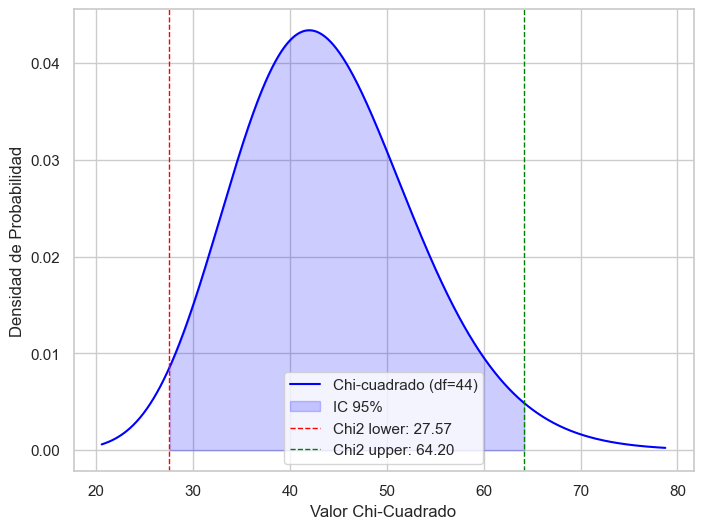

In [ ]:
from scipy.stats import chi2
# Calcular la varianza muestral
n = score_specific_continent.count()  # Tama√±o de la muestra
alpha = 0.05  # Nivel de significancia (95% de confianza)

# Valores cr√≠ticos de la distribuci√≥n chi-cuadrado
chi2_lower = chi2.ppf(alpha / 2, n - 1)
chi2_upper = chi2.ppf(1 - alpha / 2, n - 1)

# Intervalo de confianza de la varianza
ic_lower = (n - 1) * variance_square / chi2_upper
ic_upper = (n - 1) * variance_square / chi2_lower

print(f'Varianza muestral: {variance_square}')
print(f'Intervalo de confianza de la varianza: ({ic_lower}, {ic_upper})')

x = np.linspace(chi2.ppf(0.001, n - 1), chi2.ppf(0.999, n - 1), 1000)
y = chi2.pdf(x, n - 1)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f'Chi-cuadrado (df={n-1})', color='blue')
plt.fill_between(x, y, where=(x >= chi2_lower) & (x <= chi2_upper), color='blue', alpha=0.2, label='IC 95%')
plt.axvline(chi2_lower, color='red', linestyle='dashed', linewidth=1, label=f'Chi2 lower: {chi2_lower:.2f}')
plt.axvline(chi2_upper, color='green', linestyle='dashed', linewidth=1, label=f'Chi2 upper: {chi2_upper:.2f}')

plt.xlabel('Valor Chi-Cuadrado')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()


### Indice Compuesto de Bienestar


Como es algo notable en nuestra regi√≥n muchas veces el √≠ndice de felicidad de algunos pa√≠ses puede tener una variaci√≥n significativa con respecto al √≠ndice de felicidad de su continente , algunos pa√≠ses con una variaci√≥n positiva y otros con una situaci√≥n un poco 
m√°s desfavorable , con este nuevo calculo pretendemos reflejar esa *"Desviaci√≥n Local"*


### F√≥rmula para la Desviaci√≥n Local (DL)

$$ DL_i = Score_i - \frac{1}{n_c} \sum_{j \in C_i} Score_j $$

Donde:
- $DL_i$ es la Desviaci√≥n Local del pa√≠s $i$
- $Score_i$ es el Score de felicidad del pa√≠s $i$ 
- $C_i$ es el conjunto de pa√≠ses del continente al que pertenece el pa√≠s $i$
- $n_c$ es el n√∫mero de pa√≠ses en el continente $C_i$
- $\sum_{j \in C_i} Score_j$ es la suma de los Scores de todos los pa√≠ses del continente $C_i$


In [ ]:
media_por_continente = df.groupby('Continent')['Score'].transform('mean') 
df['Local Deviation'] = df['Score'] - media_por_continente
df.head(10)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   
5             6       Switzerland  7.480           1.452           1.526   
6             7            Sweden  7.343           1.387           1.487   
7             8       New Zealand  7.307           1.303           1.557   
8             9            Canada  7.278           1.365           1.505   
9            10           Austria  7.246           1.376           1.475   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   
5                    1.052                         0.572       0.263   
6                    1.009                         0.574       0.267   
7                    1.026                         0.585       0.330   
8                    1.039                         0.584       0.285   
9                    1.016                         0.532       0.244   

   Perceptions of corruption      Continent  Local Deviation  
0                      0.393         Europe         1.534140  
1                      0.410         Europe         1.365140  
2                      0.341         Europe         1.319140  
3                      0.118         Europe         1.259140  
4                      0.298         Europe         1.253140  
5                      0.343         Europe         1.245140  
6                      0.373         Europe         1.108140  
7                      0.380        Oceania         0.039500  
8                      0.308  North America         1.123308  
9                      0.226         Europe         1.011140

Creemeos un gr√°fico de cajas y bigotes para representar este nuevo dato agregado a nuestra base de datos.

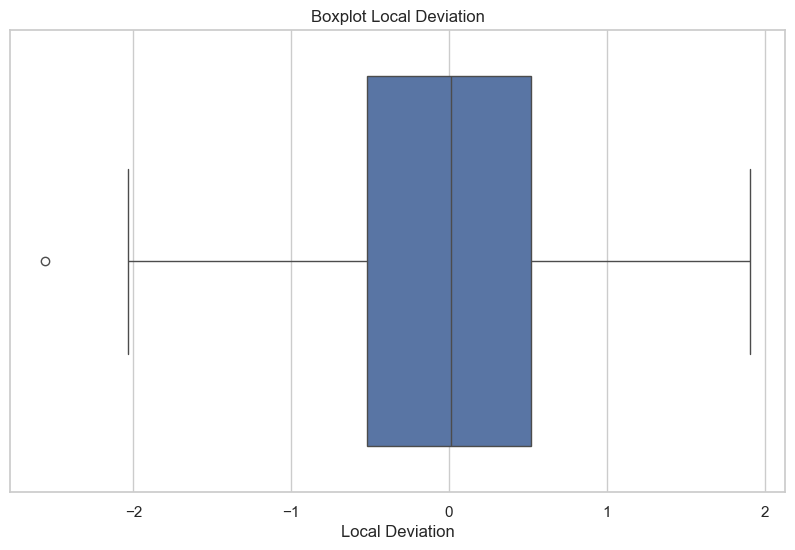

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Local Deviation', data=df)
plt.title('Boxplot Local Deviation')
plt.show()

### An√°lisis de los resultados
Notemos el comportamiento de nuestros datos seg√∫n nuestro gr√°fico. Se puede concluir que, en efecto, el √≠ndice de felicidad de los pa√≠ses est√° estrechamente relacionado con el √≠ndice de felicidad de su continente. Adem√°s los pa√≠ses cuyo valor de desviaci√≥n est√© indicado por los "Bigotes", se puede afirmar que su √≠ndice de felicidad es considerablemente mayor o menor que el de su continente respectivamente. 

## Visualizaci√≥n adicional
### Boxplot de una columna

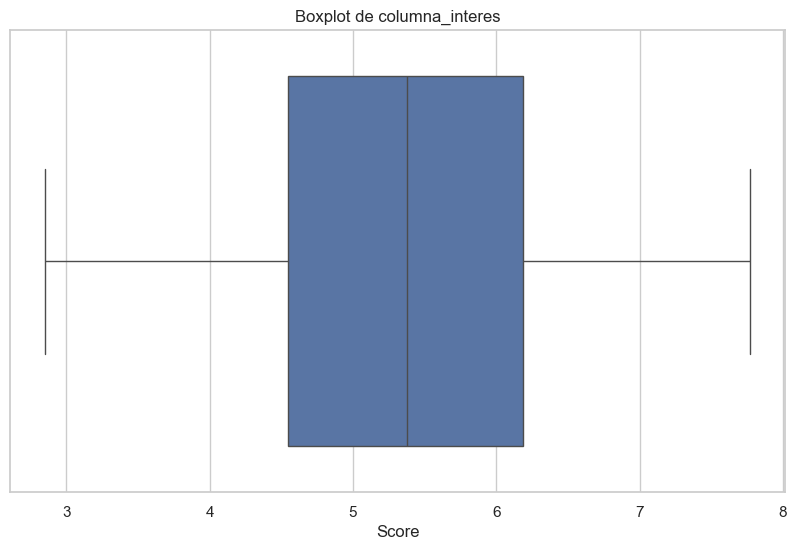

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', data=df)
plt.title('Boxplot de columna_interes')
plt.show()

### An√°lisis adicional
## An√°lisis de la media y la mediana de una columna

In [ ]:
mean_value = df['Score'].mean()
median_value = df['Score'].median()
print(f'Media de columna_interes: {mean_value}')
print(f'Mediana de columna_interes: {median_value}')

### Tests de Normalidad - Score


In [ ]:
df = pd.read_csv('2019.csv')
# Cargar los datos
scores = df['Score']

# 1. Test de Shapiro-Wilk (el m√°s potente para muestras peque√±as)
shapiro_test = stats.shapiro(scores)

# 2. Test de Anderson-Darling
anderson_test = stats.anderson(scores, dist='norm')

# Visualizaciones para evaluar normalidad

# 4. Q-Q Plot (Gr√°fico Cuantil-Cuantil)
plt.figure(figsize=(12, 4))

plt.subplot(131)
stats.probplot(scores, plot=plt)
plt.title('Q-Q Plot')

# 5. Histograma con curva normal
plt.subplot(132)
sns.histplot(scores, kde=True)
plt.title('Histograma con Distribuci√≥n Normal')

# 6. Boxplot
plt.subplot(133)
sns.boxplot(x=scores)
plt.title('Boxplot')

plt.tight_layout()
plt.show()

# Imprimir resultados de los tests
print("Test de Shapiro-Wilk:")
print(f"Estad√≠stico: {shapiro_test.statistic:.4f}")
print(f"P-valor: {shapiro_test.pvalue:.4f}")

print("\nTest de Anderson-Darling:")
print("Estad√≠sticos cr√≠ticos:")
for i in range(len(anderson_test.critical_values)):
    sig_level = anderson_test.significance_level[i]
    crit_val = anderson_test.critical_values[i]
    print(f"Nivel de significancia {sig_level}%: Valor cr√≠tico = {crit_val:.4f}")
print(f"Estad√≠stico: {anderson_test.statistic:.4f}")

# Interpretaci√≥n

# Shapiro-Wilk
print("\n--- Interpretaci√≥n Shapiro-Wilk ---")
if shapiro_test.pvalue > alpha:
    print("Los datos parecen seguir una distribuci√≥n normal seg√∫n Shapiro-Wilk")
else:
    print("Los datos NO parecen seguir una distribuci√≥n normal seg√∫n Shapiro-Wilk")

# Anderson-Darling
print("\n--- Interpretaci√≥n Anderson-Darling ---")
print(f"Estad√≠stico A: {anderson_test.statistic:.4f}")

# Comparar con valores cr√≠ticos
print("\nValores cr√≠ticos:")
for i in range(len(anderson_test.critical_values)):
    sig_level = anderson_test.significance_level[i]
    crit_val = anderson_test.critical_values[i]
    
    print(f"Nivel de significancia {sig_level}%:")
    print(f"  Valor cr√≠tico: {crit_val:.4f}")
    
    if anderson_test.statistic < crit_val:
        print(f"  ‚úÖ No se rechaza normalidad al {sig_level}%")
    else:
        print(f"  ‚ùå Se rechaza normalidad al {sig_level}%")


NameError: name 'stats' is not defined

## Conclusiones
### Criterios de Evaluaci√≥n:

### Shapiro-Wilk:
. Estad√≠stico W cercano a 1 ‚úÖ  
. P-valor > 0.05 ‚úÖ  
. Interpretaci√≥n: No hay evidencia para rechazar normalidad  

### Anderson-Darling:
. Estad√≠stico A menor que valores cr√≠ticos ‚úÖ  
. Interpretaci√≥n: Consistente con distribuci√≥n normal

### 3. An√°lisis Descriptivo:
. Media ‚âà Mediana (simetr√≠a) ‚úÖ  
. Asimetr√≠a cercana a 0 ‚úÖ  
. Curtosis cercana a 0 ‚úÖ  

### Visualizaciones de Soporte:
### Q-Q Plot:  
. Puntos pr√≥ximos a l√≠nea diagonal    
. Sin desviaciones sistem√°ticas    

### Histograma:  
. Forma de campana  
. Sim√©trico alrededor de la media  

### Boxplot:  
. Sin outliers extremos  
. Distribuci√≥n sim√©trica  

## Conclusi√≥n T√©cnica
. ‚úÖ Evidencia Estad√≠stica de Normalidad:    
. Pruebas formales no rechazan distribuci√≥n normal  
. Estad√≠sticos descriptivos coherentes  
. Visualizaciones consistentes con normalidad  

### Intervalos de confianza para estimar la media del Score


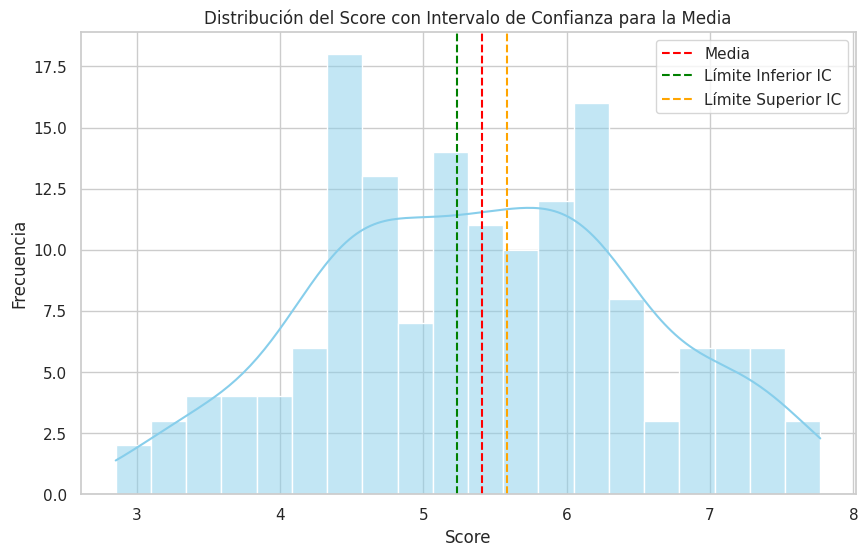

In [47]:
from scipy import stats
mean_score = df['Score'].mean()
variance_score = df['Score'].var()
n = df['Score'].count()  # Tama√±o de la muestra
alpha = 0.05  # Nivel de significancia (95% de confianza)

# Intervalo de confianza para la media
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)  # Valor cr√≠tico t
margin_of_error = t_critical * (np.sqrt(variance_score) / np.sqrt(n))
ci_mean = (mean_score - margin_of_error, mean_score + margin_of_error)


# Grafico
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], kde=True, color='skyblue', bins=20)
plt.axvline(mean_score, color='red', linestyle='--', label='Media')
plt.axvline(ci_mean[0], color='green', linestyle='--', label='L√≠mite Inferior IC')
plt.axvline(ci_mean[1], color='orange', linestyle='--', label='L√≠mite Superior IC')
plt.title('Distribuci√≥n del Score con Intervalo de Confianza para la Media')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### Intervalo de confianza para estimar la varianza del Score


Varianza muestral: 1.239035842307692
Intervalo de confianza para la varianza (95%): (1.003596601127352, 1.5687485380763575)


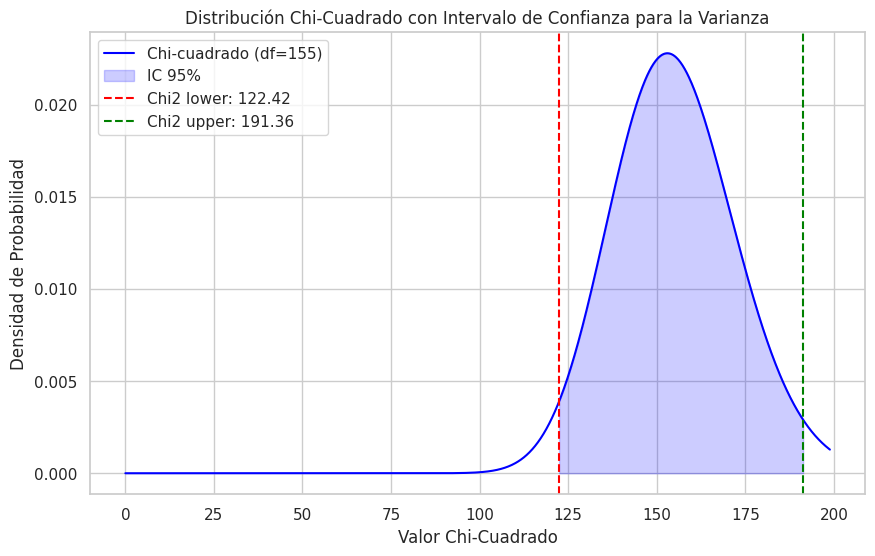

In [48]:
chi2_lower = stats.chi2.ppf(alpha / 2, df=n-1)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, df=n-1)
ci_variance = ((n - 1) * variance_score / chi2_upper, 
               (n - 1) * variance_score / chi2_lower)

print(f"Varianza muestral: {variance_score}")
print(f"Intervalo de confianza para la varianza (95%): {ci_variance}")

# Gr√°fico de la distribuci√≥n chi-cuadrado
plt.figure(figsize=(10, 6))
x = np.linspace(0, stats.chi2.ppf(0.99, df=n-1), 1000)
y = stats.chi2.pdf(x, df=n-1)

plt.plot(x, y, label=f'Chi-cuadrado (df={n-1})', color='blue')
plt.fill_between(x, y, 
                 where=(x >= chi2_lower) & (x <= chi2_upper), 
                 color='blue', 
                 alpha=0.2, 
                 label='IC 95%')

plt.axvline(chi2_lower, color='red', linestyle='dashed', 
            label=f'Chi2 lower: {chi2_lower:.2f}')
plt.axvline(chi2_upper, color='green', linestyle='dashed', 
            label=f'Chi2 upper: {chi2_upper:.2f}')

plt.title('Distribuci√≥n Chi-Cuadrado con Intervalo de Confianza para la Varianza')
plt.xlabel('Valor Chi-Cuadrado')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

### Prueba de Hipotesis - Media

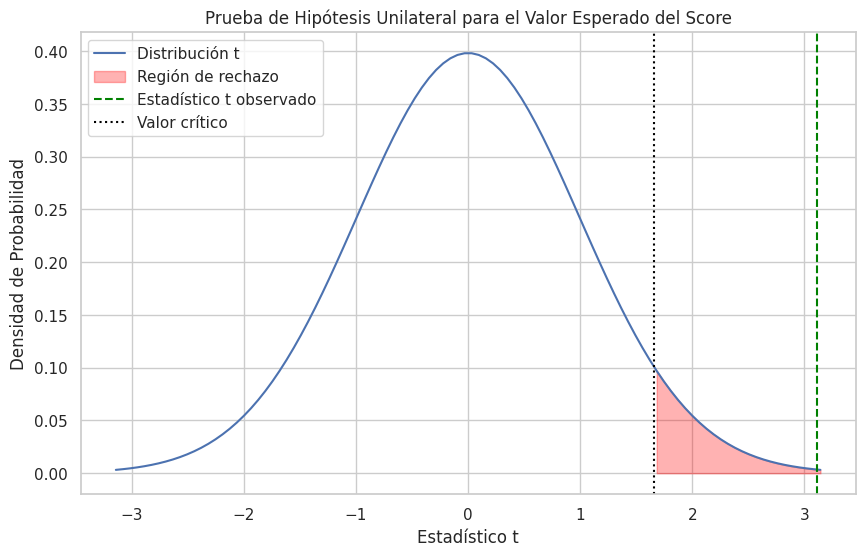

Prueba de Hip√≥tesis Unilateral para el Valor Esperado del Score
Hip√≥tesis nula (H0): Œº ‚â§ 5.13
Hip√≥tesis alternativa (H1): Œº > 5.13

Estad√≠stico t: 3.1092
Valor cr√≠tico: 1.6547
P-valor: 0.0011
Media muestral: 5.4071
Desviaci√≥n est√°ndar muestral: 1.1131

Conclusion: Rechazar H0
Hay evidencia estad√≠stica significativa para afirmar que el valor esperado del Score es mayor que 5.13


In [49]:
df = pd.read_csv('2019.csv')
# Datos del dataset
scores = df['Score']

# Par√°metros de la prueba de hip√≥tesis
# H0: Œº ‚â§ 5.5 (valor nulo)
# H1: Œº > 5.5 (prueba unilateral derecha)

# Estad√≠sticos de la muestra
sample_mean = scores.mean()
sample_std = scores.std()
n = len(scores)

# Valor nulo de la hip√≥tesis
mu_0 = 5.13

# Calcular el estad√≠stico t
t_statistic = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

# Grados de libertad
df = n - 1

# Calcular el p-valor (prueba unilateral derecha)
p_value = 1 - stats.t.cdf(t_statistic, df)

# Nivel de significancia
alpha = 0.05

# Visualizaci√≥n de la prueba de hip√≥tesis
plt.figure(figsize=(10, 6))
x = np.linspace(stats.t.ppf(0.001, df), stats.t.ppf(0.999, df), 100)
y = stats.t.pdf(x, df)

plt.plot(x, y, label='Distribuci√≥n t')
plt.title('Prueba de Hip√≥tesis Unilateral para el Valor Esperado del Score')
plt.xlabel('Estad√≠stico t')
plt.ylabel('Densidad de Probabilidad')

# Regi√≥n de rechazo (unilateral derecha)
t_critico = stats.t.ppf(1 - alpha, df)

plt.fill_between(x, y, where=(x >= t_critico), color='red', alpha=0.3, label='Regi√≥n de rechazo')

# Estad√≠stico observado
plt.axvline(t_statistic, color='green', linestyle='--', label='Estad√≠stico t observado')
plt.axvline(t_critico, color='black', linestyle=':', label='Valor cr√≠tico')

plt.legend()
plt.grid(True)
plt.show()

# Imprimir resultados
print("Prueba de Hip√≥tesis Unilateral para el Valor Esperado del Score")
print(f"Hip√≥tesis nula (H0): Œº ‚â§ {mu_0}")
print(f"Hip√≥tesis alternativa (H1): Œº > {mu_0}")
print(f"\nEstad√≠stico t: {t_statistic:.4f}")
print(f"Valor cr√≠tico: {t_critico:.4f}")
print(f"P-valor: {p_value:.4f}")
print(f"Media muestral: {sample_mean:.4f}")
print(f"Desviaci√≥n est√°ndar muestral: {sample_std:.4f}")

# Conclusi√≥n
if p_value < alpha:
    print("\nConclusion: Rechazar H0")
    print(f"Hay evidencia estad√≠stica significativa para afirmar que el valor esperado del Score es mayor que {mu_0}")
else:
    print("\nConclusion: No rechazar H0")
    print(f"No hay evidencia estad√≠stica suficiente para afirmar que el valor esperado del Score sea mayor que {mu_0}")

# Pruebas de Hip√≥teses para dos poblaciones üìäüîç

Dado que anteriormente se analizaron los datos de un pa√≠s respecto a su continente , un an√°lisis interesante podr√≠a ser establecer comparaciones entre los continentes , dado que cada uno en si tiene sus caracter√≠sticas en cada uno de los aspectos medidos en el conjunto de datos .Veamos que influencia tiene esto sobre su *felicidad*.


## !!!Previo al an√°lisis ...

### Relaci√≥n entre Pa√≠ses de √Åfrica y Europa: Una Comparaci√≥n Tradicional

La relaci√≥n entre los pa√≠ses de √Åfrica y Europa ha sido compleja y multifac√©tica a lo largo de la historia, marcada por colonizaci√≥n, comercio, conflictos y cooperaci√≥n. Al analizar esta relaci√≥n bajo la perspectiva del **√çndice de Felicidad**, donde se considera que los pa√≠ses con un 

**Score de felicidad menor a 5.5 son infelices**,

 es crucial considerar tanto los factores hist√≥ricos como los actuales que influyen en el bienestar de estas naciones.

### An√°lisis Estad√≠stico

Para comparar los √≠ndices de felicidad entre los pa√≠ses de √Åfrica y Europa, realizaremos los siguientes an√°lisis estad√≠sticos:

1. **Distribuci√≥n de los Scores de Felicidad**:
    - **Histograma y Gr√°ficos de Densidad**: Visualizaci√≥n de la distribuci√≥n de los 'Scores' de felicidad para ambos continentes.

2. **Comparaci√≥n de Medias**:
    - **Prueba t de Student para Muestras Independientes**: Evaluar si existen diferencias significativas en el promedio de los 'Scores' de felicidad entre los pa√≠ses de √Åfrica y Europa.

3. **An√°lisis de Correlaci√≥n**:
    - **Heatmap de Correlaciones**: Representaci√≥n gr√°fica de las relaciones entre variables.

4. **Regresi√≥n Lineal**:
    - **Modelado de Relaciones**: Implementar modelos de regresi√≥n para identificar y cuantificar la influencia de factores como PIB, educaci√≥n y salud en el 'Score' de felicidad.

5. **An√°lisis de Varianza (ANOVA)**:
    - **Comparaci√≥n de Varianzas**: Evaluar si las variaciones en los 'Scores' de felicidad difieren significativamente entre m√∫ltiples grupos dentro de cada continente.

Estos an√°lisis permitir√°n comprender en profundidad los factores que contribuyen a la felicidad de los pa√≠ses en √Åfrica y Europa, y c√≥mo se diferencian entre s√≠.

### Distribuci√≥n de la Felicidad en √Åfrica y Europa ü§îüìä

El siguiente histograma muestra la distribuci√≥n comparativa de los scores de felicidad entre los pa√≠ses africanos y europeos. Las barras superpuestas permiten visualizar las diferencias en los niveles de felicidad entre ambos continentes y evaluar la hip√≥tesis de que los pa√≠ses africanos tienden a tener un score de felicidad menor a 5.5 y por ende menor que el alto √≠ndice existente en los pa√≠ses europeos.


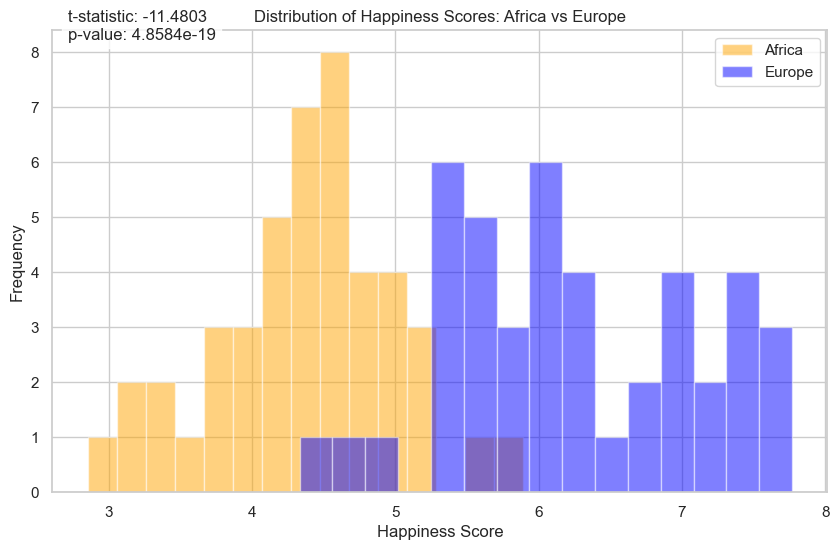

Average happiness score in Africa: 4.3683
Average happiness score in Europe: 6.2349


In [ ]:
# Filter data for Africa and Europe
africa_scores = df[df['Continent'] == 'Africa']['Score']
europe_scores = df[df['Continent'] == 'Europe']['Score']

# Create overlapping histograms
plt.figure(figsize=(10, 6))
plt.hist(africa_scores, bins=15, alpha=0.5, label='Africa', color='orange')
plt.hist(europe_scores, bins=15, alpha=0.5, label='Europe', color='blue')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores: Africa vs Europe')
plt.legend()

# Perform t-test
t_stat, p_value = ttest_ind(africa_scores, europe_scores)

# Add test results to plot
plt.text(0.02, 0.98, f't-statistic: {t_stat:.4f}\np-value: {p_value:.4e}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

# Print averages
print(f"Average happiness score in Africa: {africa_scores.mean():.4f}")
print(f"Average happiness score in Europe: {europe_scores.mean():.4f}")

### An√°lisis visual -- QQPlots üìä

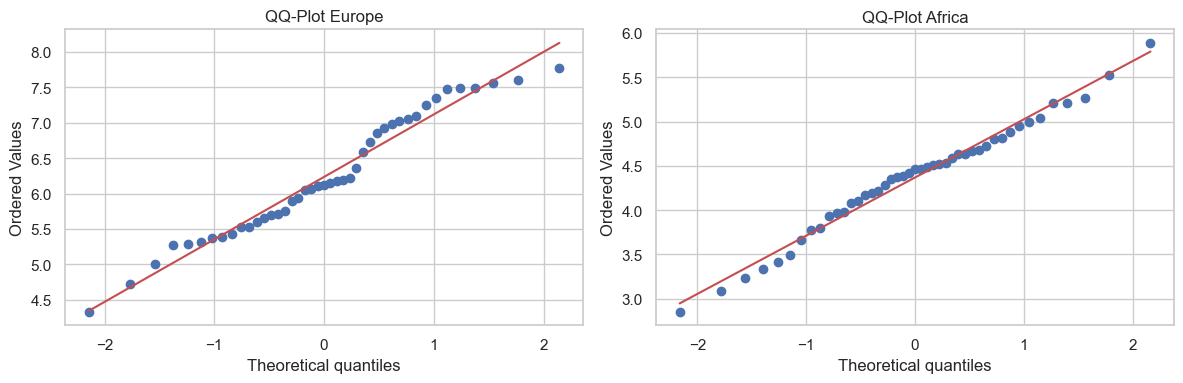

In [21]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
st.probplot(europe_scores, dist="norm", plot=plt)
plt.title("QQ-Plot Europe")

plt.subplot(122)
st.probplot(africa_scores, dist="norm", plot=plt)
plt.title("QQ-Plot Africa")

plt.tight_layout()
plt.show()

## Conclusiones de los Q-Q Plots üìäüìà
### La **l√≠nea roja** representa una **distribuci√≥n normal te√≥rica** 
### Europa (QQ-Plot Europe):
- Los puntos se alinean de forma moderada con la l√≠nea roja. 
- En los extremos (especialmente en la cola superior), los puntos comienzan a desviarse de la l√≠nea, lo que sugiere la presencia de datos extremos o posibles asimetr√≠as.
- **Conclusi√≥n**: La distribuci√≥n de los √≠ndices de felicidad en Europa podr√≠a aproximarse a una distribuci√≥n normal en los valores centrales, pero hay una desviaci√≥n en los valores extremos.

### √Åfrica (QQ-Plot Africa):
- Los puntos muestran una mayor desviaci√≥n respecto de la l√≠nea roja en comparaci√≥n con el gr√°fico de Europa, especialmente en ambas colas.
- Esto sugiere que la distribuci√≥n de la felicidad en √Åfrica es menos sim√©trica y no sigue una normalidad ideal.
- **Conclusi√≥n**: La distribuci√≥n de los √≠ndices de felicidad en √Åfrica tiene menos similitud a una distribuci√≥n normal, con posibles colas m√°s pesadas o asimetr√≠as.

La distribuci√≥n de los √≠ndices de felicidad para Europa parece ser m√°s consistente con una distribuci√≥n normal que la de √Åfrica.Esto puede reflejar diferencias en c√≥mo los factores que influyen en la felicidad est√°n distribuidos en ambas regiones.

### Ser√≠a ideal corroborar esto con medidas estad√≠sticas, como **pruebas de normalidad** (Kolmogorov-Smirnov, Shapiro-Wilk, etc.). üòå


In [22]:
ks_europe = st.kstest(europe_scores, 'norm', args=(np.mean(europe_scores), np.std(europe_scores)))
ks_africa = st.kstest(africa_scores, 'norm', args=(np.mean(africa_scores), np.std(africa_scores)))

print("\nTest de Normalidad (Kolmogorov-Smirnov):")
print("Europa - Estad√≠stico:", round(ks_europe[0], 4), "P-valor:", round(ks_europe[1], 4))
print("√Åfrica - Estad√≠stico:", round(ks_africa[0], 4), "P-valor:", round(ks_africa[1], 4))


Test de Normalidad (Kolmogorov-Smirnov):
Europa - Estad√≠stico: 0.1102 P-valor: 0.6338
√Åfrica - Estad√≠stico: 0.0885 P-valor: 0.8416


#### üîçInterpretaci√≥n del Test de Normalidad (Kolmogorov-Smirnov):
1. **Europa**:
   - Estad√≠stico: 0.1102
   - P-valor: 0.6338
   - El p-valor es mucho mayor que el nivel de significancia est√°ndar (0.05), por lo que no se rechaza la hip√≥tesis nula de que los datos siguen una distribuci√≥n normal. Esto sugiere que los puntajes de felicidad en Europa podr√≠an ser considerados normales.

2. **√Åfrica**:
   - Estad√≠stico: 0.0885
   - P-valor: 0.8416
   - De manera similar, el p-valor tambi√©n es mayor a 0.05. No se rechaza la hip√≥tesis nula, indicando que los datos de felicidad en √Åfrica tambi√©n pueden ser considerados normales.


In [25]:
# 3. Levene's test for homogeneity of variances
levene = st.levene(europe_scores, africa_scores)
print("\nTest de Homogeneidad de Varianzas (Levene):")
print("Estad√≠stico:", round(levene[0], 4), "P-valor:", round(levene[1], 4))


Test de Homogeneidad de Varianzas (Levene):
Estad√≠stico: 5.247 P-valor: 0.0244


#### üîçInterpertaci√≥n del Test de Homogeneidad de Varianzas (Levene):
- Estad√≠stico: 5.247
- P-valor: 0.0244
- En este caso, el p-valor es menor que 0.05, lo que implica que se rechaza la hip√≥tesis nula de varianzas homog√©neas. Esto sugiere que las varianzas de los puntajes de felicidad entre Europa y √Åfrica son significativamente diferentes.

In [26]:
# 4. T-test for difference in means
ttest = st.ttest_ind(europe_scores, africa_scores, equal_var=True)
print("\nPrueba t para diferencia de medias:")
print("Estad√≠stico t:", round(ttest[0], 4), "P-valor:", round(ttest[1], 4))


Prueba t para diferencia de medias:
Estad√≠stico t: 11.4803 P-valor: 0.0


#### üîçInterpretaci√≥n de la Prueba t para diferencia de medias:
- **Estad√≠stico t:** 11.4803  
- **P-valor:** 0.0  

El p-valor es significativamente menor al nivel est√°ndar de significancia (0.05), lo que indica que se rechaza la hip√≥tesis nula. Esto sugiere que hay una diferencia significativa en las medias de los √≠ndices de felicidad entre Europa y √Åfrica.üìâ


In [27]:
# 5. Descriptive statistics
print("\nEstad√≠sticas Descriptivas:")
print("Europa - Media:", round(europe_scores.mean(), 4), "Desviaci√≥n est√°ndar:", round(europe_scores.std(), 4))
print("√Åfrica - Media:", round(africa_scores.mean(), 4), "Desviaci√≥n est√°ndar:", round(africa_scores.std(), 4))


Estad√≠sticas Descriptivas:
Europa - Media: 6.2349 Desviaci√≥n est√°ndar: 0.8696
√Åfrica - Media: 4.3683 Desviaci√≥n est√°ndar: 0.6437


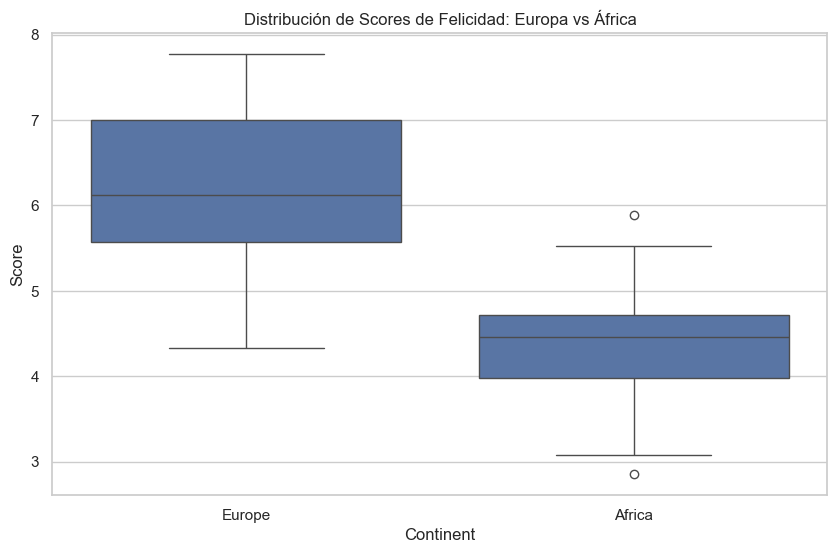

In [28]:
# 6. Box plot comparison
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Continent', y='Score', order=['Europe', 'Africa'])
plt.title('Distribuci√≥n de Scores de Felicidad: Europa vs √Åfrica')
plt.show()

### Regresion Lineal
Evidentemente, nuestros datos est√°n relacionados con numerosos √≠ndices de los campos economicos, sociales y de la salud. Ser√≠a interesante visualizar que tan realacionados est√° alguno de estos datos con el √≠ndice de la Felicidad (score). Para ello utilizaremos Regresi√≥n Lineal, la cual es una t√©cnica que establece una l√≠nea recta en el comportamiento de nuestros datos para identificar que tan relacionados est√°n.

Intersecci√≥n: 3.399345178292417
Pendiente: 2.2181480010083567
La ecuaci√≥n de la recta es: y = 3.399345178292417 + 2.2181480010083567x


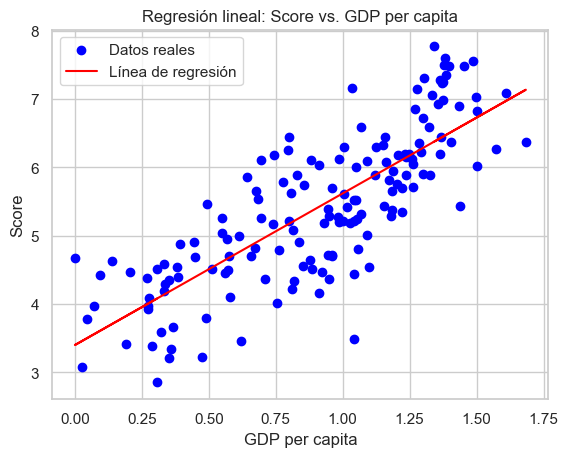

In [ ]:
#Hagamos un ejemplo con el Score y el PGB per Capita
x = df[['GDP per capita']]
y = df['Score']

#Preparando el modelo
model = LinearRegression()
model.fit(x, y)

#Obtener del intercepto y la pendiente
intercept = model.intercept_
slope = model.coef_[0]

print(f"Intersecci√≥n: {intercept}")
print(f"Pendiente: {slope}")
print(f"La ecuaci√≥n de la recta es: y = {intercept} + {slope}x")

y_pred = model.predict(x)

plt.scatter(x, y, color='blue', label='Datos reales')
plt.plot(x, y_pred, color='red', label='L√≠nea de regresi√≥n')
plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.title('Regresi√≥n lineal: Score vs. GDP per capita')
plt.legend()
plt.show()

### Regresi√≥n Lineal M√∫ltiple
La regresi√≥n lineal m√∫ltiple es una t√©cnica estad√≠stica que se utiliza para modelar la relaci√≥n entre una variable dependiente (Y) y dos o m√°s variables independientes (X1, X2, X3, etc.). A diferencia de la regresi√≥n lineal simple, que tiene solo una variable independiente, la regresi√≥n lineal m√∫ltiple permite considerar varios factores que pueden influir en la variable dependiente. Para nuestro caso particular veremos que tan relacionado est√° el Score con el Apoyo Social, El √≠ndice de vida saludable y la Libertidad para tomar sus propias decisiones. 

Intercepto: 1.6232926811256072
Coeficientes [1.94962299 1.36129276 1.84502399]
La ecuaci√≥n del modelo es: y = 1.6232926811256072 + (1.9496229874712638*Healthy life expectancy) + (1.3612927592111328*Social support) + (1.8450239891517468*Freedom to make life choices)
R^2: 0.7496594273964103


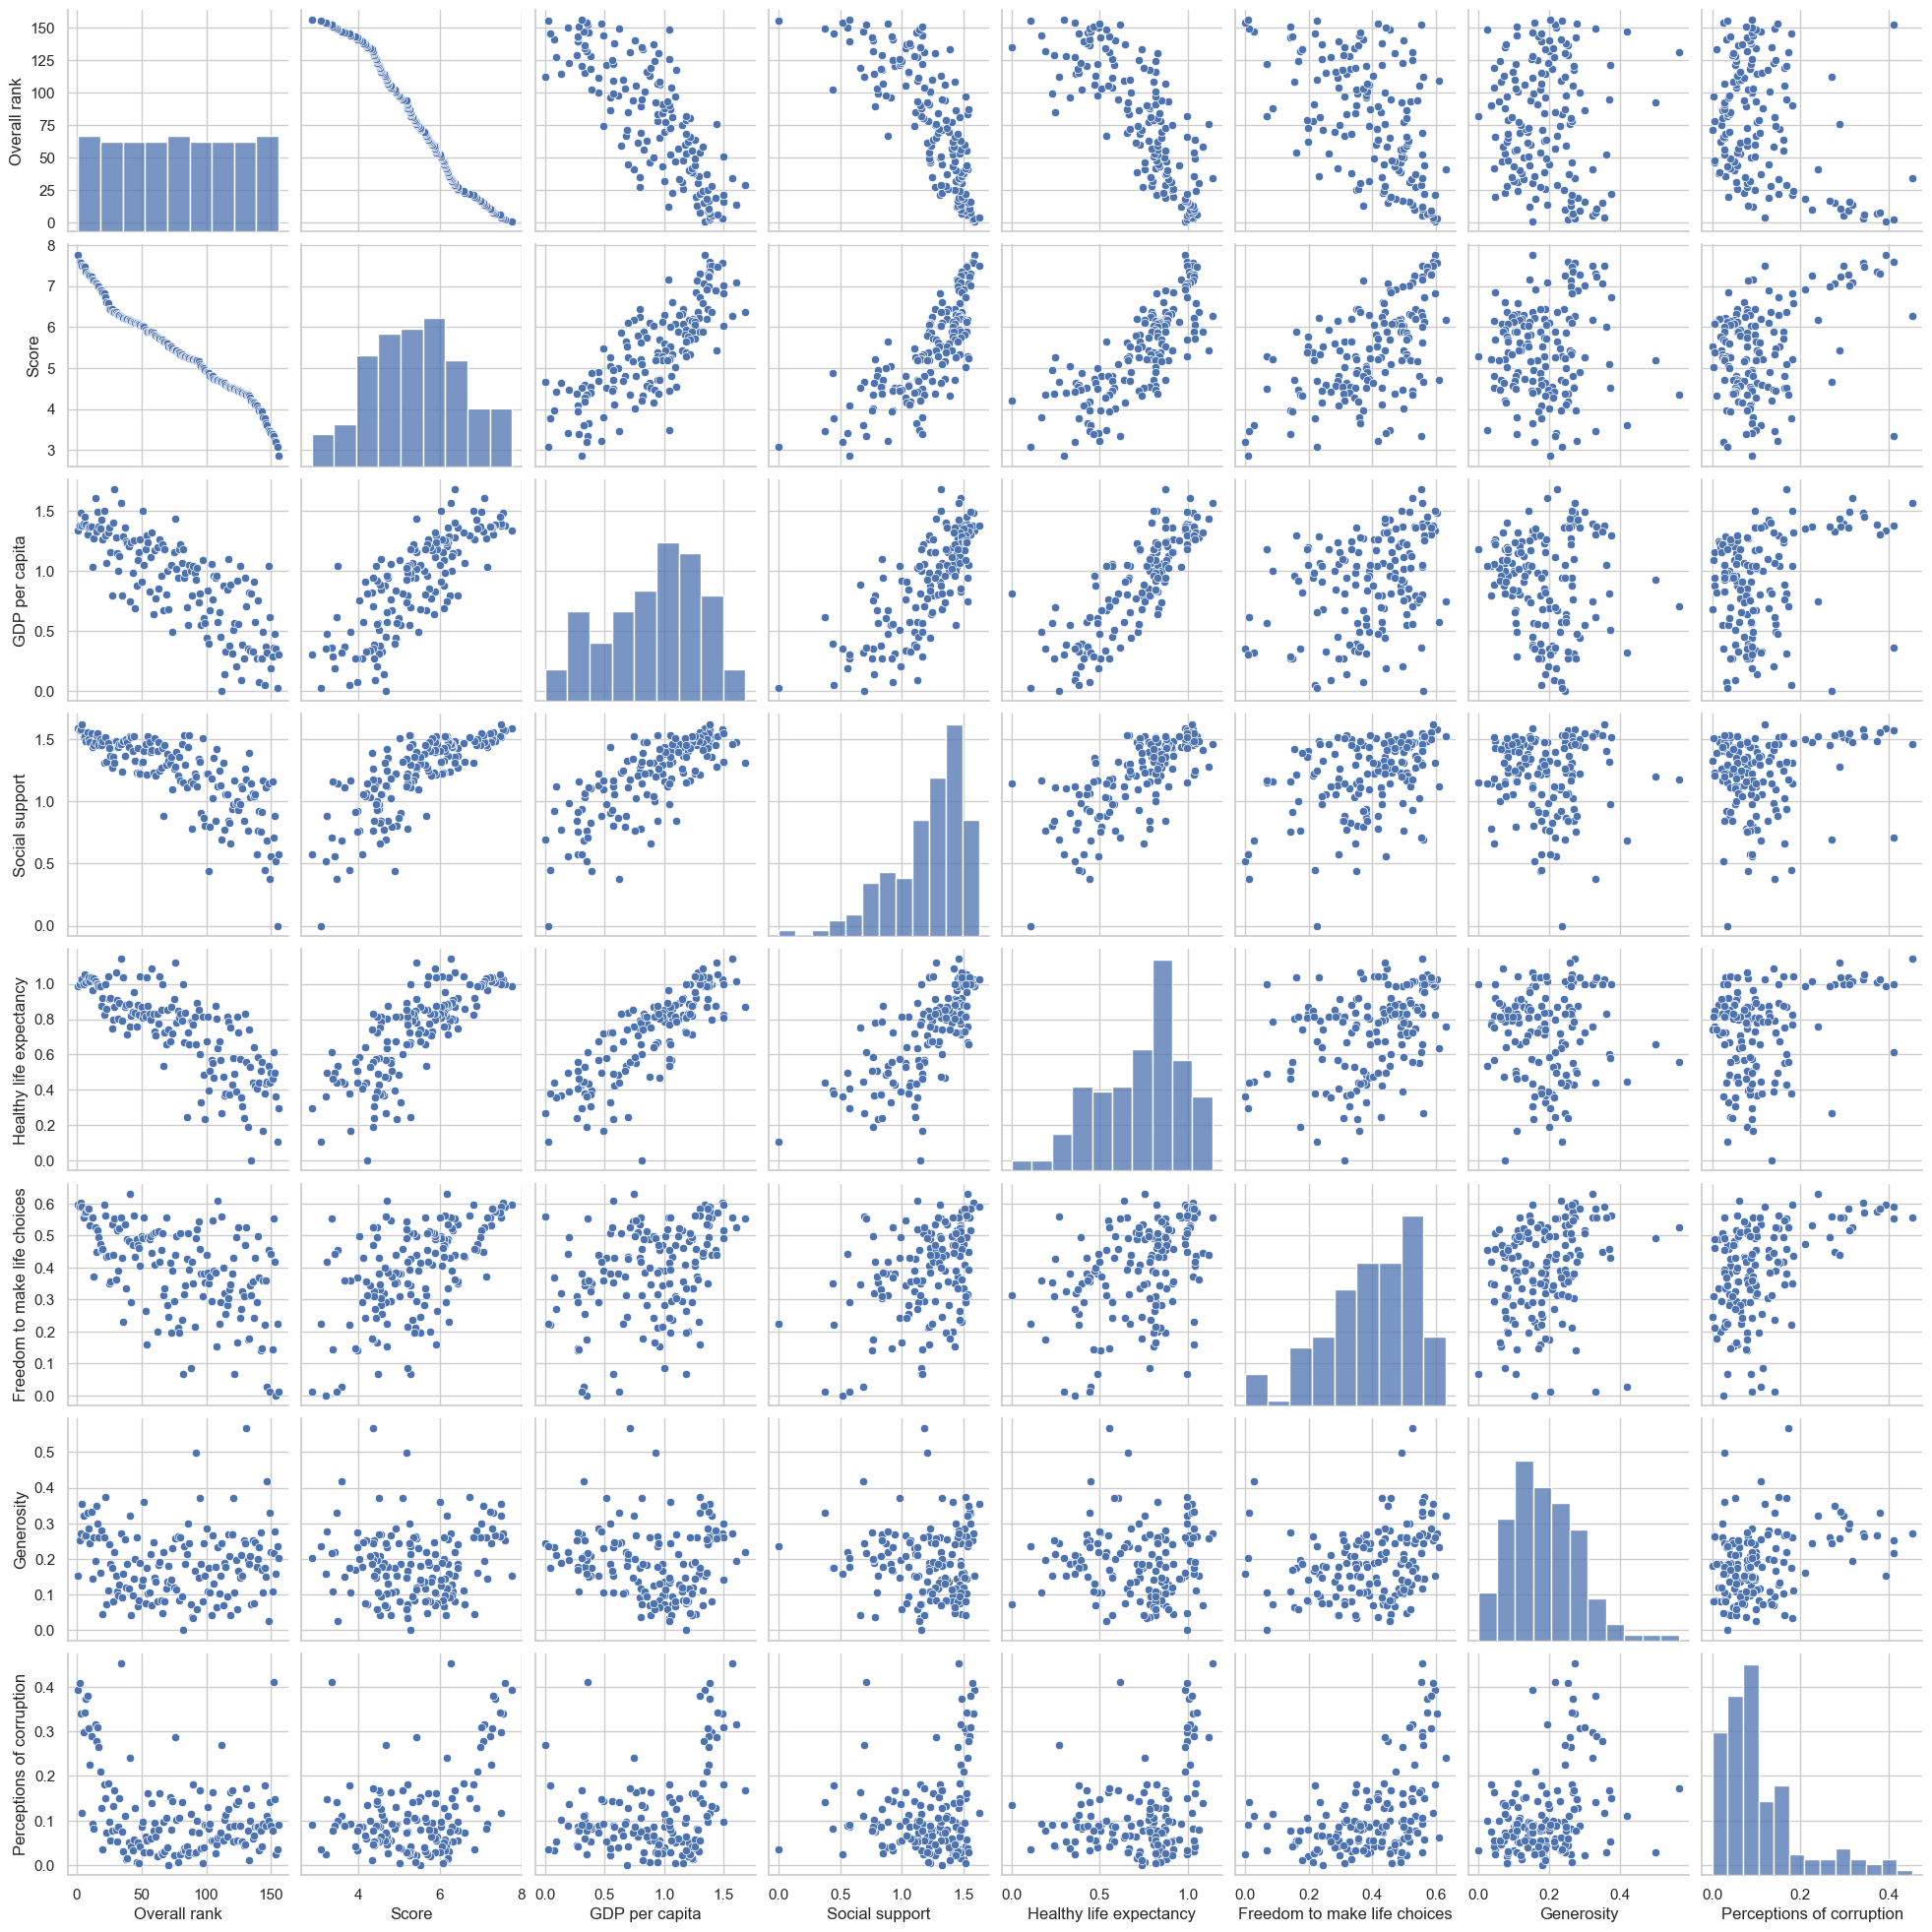

In [41]:
from mpl_toolkits.mplot3d import Axes3D

X = df[['Healthy life expectancy', 'Social support', 'Freedom to make life choices']]
Y = df['Score']

model = LinearRegression()
model.fit(X, Y)

intercept = model.intercept_
coefficients = model.coef_

print(f"Intercepto: {intercept}")
print(f"Coeficientes {coefficients}")
print(f"La ecuaci√≥n del modelo es: y = {intercept} + ({coefficients[0]}*Healthy life expectancy) + ({coefficients[1]}*Social support) + ({coefficients[2]}*Freedom to make life choices)")

# Predicciones
y_pred = model.predict(X)

# Evaluaci√≥n del modelo
r2 = r2_score(y, y_pred)
print(f"R^2: {r2}")

# Visualizaci√≥n
sns.pairplot(df)
plt.show()

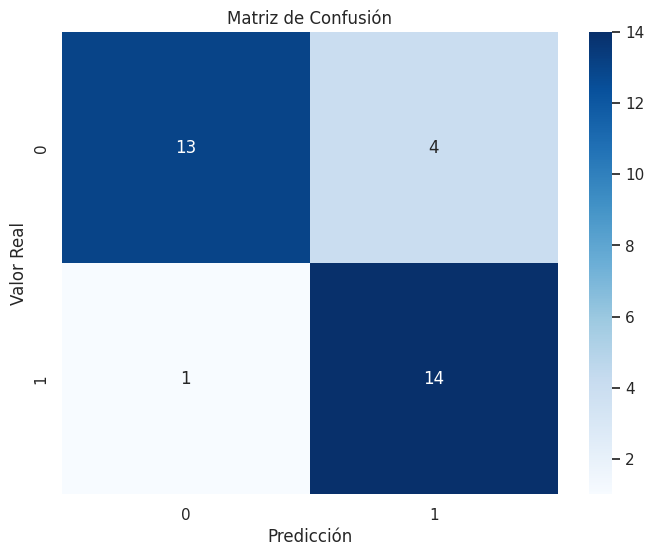


M√©tricas del modelo:
Exactitud (Accuracy): 84.38%
Precisi√≥n: 77.78%
Sensibilidad (Recall): 93.33%
F1-Score: 84.85%

Interpretaci√≥n de la matriz de confusi√≥n:
Verdaderos Negativos (VN): 13 pa√≠ses correctamente clasificados como no felices
Falsos Positivos (FP): 4 pa√≠ses incorrectamente clasificados como felices
Falsos Negativos (FN): 1 pa√≠ses incorrectamente clasificados como no felices
Verdaderos Positivos (VP): 14 pa√≠ses correctamente clasificados como felices


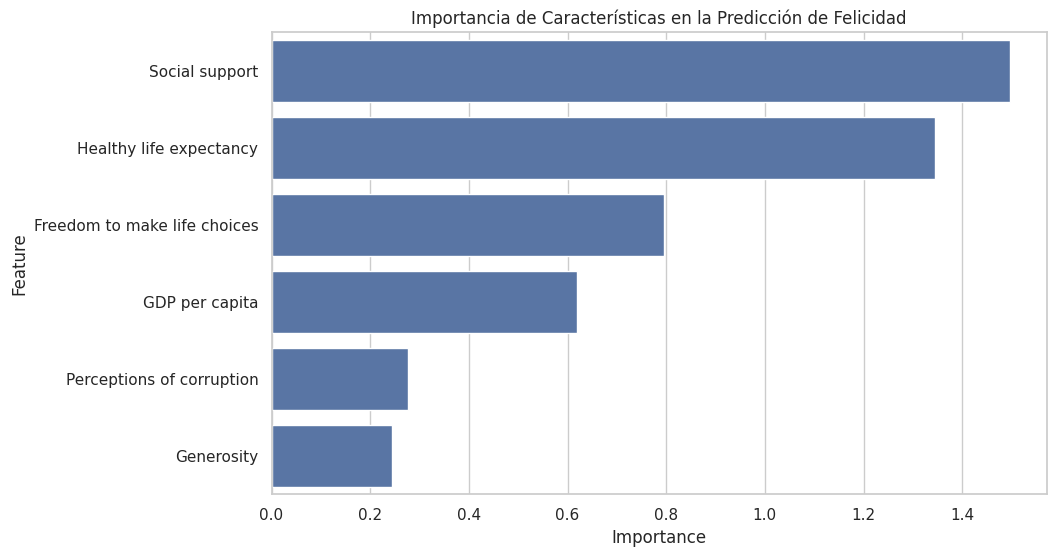


Predicci√≥n para pa√≠s hipot√©tico:
Clasificaci√≥n: Feliz
Probabilidad: 66.02% de ser feliz


/home/uhc121/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [20]:
### Regresi√≥n Log√≠stica para Clasificaci√≥n de Felicidad

# Nos permite analizar la importancia de cada dato para la felicidad

# Importar bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Crear variable binaria basada en la media del Score
mean_happiness = df['Score'].mean()
df['is_happy'] = (df['Score'] > mean_happiness).astype(int)

# Seleccionar caracter√≠sticas para el modelo
features = ['GDP per capita', 'Social support', 'Healthy life expectancy', 
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
X = df[features]
y = df['is_happy']

# Escalar las caracter√≠sticas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)


# Visualizar matriz de confusi√≥n
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusi√≥n')
plt.ylabel('Valor Real')
plt.xlabel('Predicci√≥n')
plt.show()

# Calcular m√©tricas
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
precision = cm[1,1] / (cm[1,1] + cm[0,1])
recall = cm[1,1] / (cm[1,1] + cm[1,0])
f1 = 2 * (precision * recall) / (precision + recall)

print(f"\nM√©tricas del modelo:")
print(f"Exactitud (Accuracy): {accuracy:.2%}")
print(f"Precisi√≥n: {precision:.2%}")
print(f"Sensibilidad (Recall): {recall:.2%}")
print(f"F1-Score: {f1:.2%}")

# Interpretaci√≥n por cuadrante
print("\nInterpretaci√≥n de la matriz de confusi√≥n:")
print(f"Verdaderos Negativos (VN): {cm[0,0]} pa√≠ses correctamente clasificados como no felices")
print(f"Falsos Positivos (FP): {cm[0,1]} pa√≠ses incorrectamente clasificados como felices")
print(f"Falsos Negativos (FN): {cm[1,0]} pa√≠ses incorrectamente clasificados como no felices")
print(f"Verdaderos Positivos (VP): {cm[1,1]} pa√≠ses correctamente clasificados como felices")

# Analizar importancia de caracter√≠sticas
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importancia de Caracter√≠sticas en la Predicci√≥n de Felicidad')
plt.show()

# Ejemplo de predicci√≥n para un nuevo pa√≠s
def predict_happiness(country_data):
    # Escalar los datos
    scaled_data = scaler.transform([country_data])
    # Realizar predicci√≥n
    prediction = model.predict(scaled_data)
    probability = model.predict_proba(scaled_data)
    return prediction[0], probability[0]

# Ejemplo de uso
example_country = [1.0, 1.2, 0.8, 0.5, 0.2, 0.1]  # Valores ejemplo
prediction, probability = predict_happiness(example_country)
print("\nPredicci√≥n para pa√≠s hipot√©tico:")
print(f"Clasificaci√≥n: {'Feliz' if prediction == 1 else 'No feliz'}")
print(f"Probabilidad: {probability[1]:.2%} de ser feliz")

# Resultados del Modelo de Regresi√≥n Log√≠stica üìä

## Factores m√°s Influyentes en la Felicidad

El an√°lisis muestra que el **apoyo social** (social support) y la **esperanza de vida saludable** (healthy life expectancy) son los factores m√°s determinantes para la felicidad de un pa√≠s. Esto sugiere que las sociedades con fuertes redes de apoyo y buenos sistemas de salud tienden a ser m√°s felices.

Por otro lado, la **generosidad** y la **percepci√≥n de corrupci√≥n** mostraron una influencia considerablemente menor en el nivel de felicidad de los pa√≠ses, indicando que estos factores no son tan cruciales para determinar el bienestar general de una naci√≥n.

Esta informaci√≥n podr√≠a ser valiosa para orientar pol√≠ticas p√∫blicas hacia el fortalecimiento de sistemas de apoyo social y servicios de salud.

## **Conclusiones generales** üîç‚ö†Ô∏è‚ú®
Los datos analizados indican una diferencia significativa en los niveles de felicidad entre √Åfrica y Europa. Los an√°lisis estad√≠sticos revelan:

1. Normalidad en la distribuci√≥n de los scores de felicidad
2. Diferencias significativas en las medias (p-valor < 0.05)
3. Mayor variabilidad en los scores africanos
4. Media europea (‚âà 6.23) significativamente superior a la africana (‚âà 4.37)

Esta disparidad refleja diferencias socioecon√≥micas, hist√≥ricas y estructurales entre ambos continentes, sugiriendo la necesidad de pol√≠ticas espec√≠ficas para mejorar el bienestar en √Åfrica. üåç

La felicidad de los pa√≠ses africanos en comparaci√≥n con los europeos est√° intr√≠nsecamente ligada a una serie de factores hist√≥ricos y contempor√°neos. Para mejorar el **Score de felicidad** en √Åfrica, es fundamental abordar las ra√≠ces hist√≥ricas de desigualdad y explotaci√≥n, al mismo tiempo que se promueven pol√≠ticas que fortalezcan la econom√≠a, la educaci√≥n, la salud y la gobernanza. La colaboraci√≥n entre √Åfrica y Europa puede ser un motor clave para impulsar el bienestar y la felicidad en ambas regiones, siempre que se base en el respeto mutuo y un compromiso genuino con el desarrollo sostenible y equitativo.